In [9]:
import os
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Settings
img_size = (128, 128)
batch_size = 8
AUTOTUNE = tf.data.AUTOTUNE
num_classes = 7  # Set your number of classes

# Dataset paths
train_path = "E:/final_dataset/train"
val_path = "E:/final_dataset/val"


In [10]:
train_ds = image_dataset_from_directory(
    train_path,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_path,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size
)

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 9469 files belonging to 7 classes.
Found 2810 files belonging to 7 classes.


In [4]:
# Input layer
inputs = Input(shape=(*img_size, 3))

# Preprocess input
x = preprocess_input(inputs)

# Base model: DenseNet121
base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=x)
base_model.trainable = False  # Freeze layers

# Classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs, outputs)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ true_divide (TrueDivide)      │ (None, 128, 128, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 128, 128, 3)       │               0 │ true_divide[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ true_divide_1 (TrueDivide)    │ (None, 128, 128, 3)       │               0 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 134, 134, 3)       │               0 │ true_divide_1[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 32, 32, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 32, 32, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 128)       │               

 Total params: 7,044,679 (26.87 MB)

 Trainable params: 7,175 (28.03 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
checkpoint_cb = ModelCheckpoint(
    filepath="E:/best_densenet_model.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [7]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[checkpoint_cb, earlystop_cb]
)


Epoch 1/20
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.3143 - loss: 1.8715
Epoch 1: val_accuracy improved from -inf to 0.54769, saving model to E:/best_densenet_model.keras
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 527s 434ms/step - accuracy: 0.3143 - loss: 1.8713 - val_accuracy: 0.5477 - val_loss: 1.1980
Epoch 2/20
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.4799 - loss: 1.3613
Epoch 2: val_accuracy improved from 0.54769 to 0.57936, saving model to E:/best_densenet_model.keras
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 522s 441ms/step - accuracy: 0.4799 - loss: 1.3613 - val_accuracy: 0.5794 - val_loss: 1.1169
Epoch 3/20
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.5019 - loss: 1.3096
Epoch 3: val_accuracy did not improve from 0.57936
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 505s 427ms/step - accuracy: 0.5019 - loss: 1.3096 - val_accuracy: 0.5630 - val_loss: 1.1532
Epoch 4/20
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.5070 - loss: 1.2942
Epoch 4: val_accuracy

In [14]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load the trained model from E: drive
model = load_model("E:/best_densenet_model.keras")

# Unfreeze last 50 layers, but keep BatchNormalization frozen
dense_layers = [layer for layer in model.layers if 'conv' in layer.name or 'dense' in layer.name]

# Unfreeze last 50 non-BatchNorm layers
unfrozen_count = 0
for layer in reversed(dense_layers):
    if not isinstance(layer, BatchNormalization):
        layer.trainable = True
        unfrozen_count += 1
    if unfrozen_count >= 50:
        break

# Freeze all BatchNormalization layers
for layer in model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = False

# Recompile with lower learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Count trainable layers
trainable_count = sum([layer.trainable for layer in model.layers])
print(f"Trainable layers after unfreezing: {trainable_count}")

# Continue training (fine-tuning)
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[checkpoint_cb, earlystop_cb]
)


Trainable layers after unfreezing: 53
Epoch 1/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.5411 - loss: 1.1838
Epoch 1: val_accuracy improved from 0.60961 to 0.62456, saving model to E:/best_densenet_model.keras
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 585s 480ms/step - accuracy: 0.5411 - loss: 1.1837 - val_accuracy: 0.6246 - val_loss: 1.0030
Epoch 2/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.5538 - loss: 1.1598
Epoch 2: val_accuracy improved from 0.62456 to 0.62811, saving model to E:/best_densenet_model.keras
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 585s 494ms/step - accuracy: 0.5538 - loss: 1.1597 - val_accuracy: 0.6281 - val_loss: 0.9949
Epoch 3/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.5602 - loss: 1.1349
Epoch 3: val_accuracy improved from 0.62811 to 0.63203, saving model to E:/best_densenet_model.keras
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 566s 478ms/step - accuracy: 0.5602 - loss: 1.1349 - val_accuracy: 0.6320 - val_loss: 0.9880
Epoch 4/10
1184/1184

In [19]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import BatchNormalization, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# ✅ Load the base model (already pre-trained and saved)
model = load_model("E:/best_densenet_model.keras")

# ✅ Freeze all BatchNorm layers and unfreeze last 103 non-BN layers
trainable_count = 0
for layer in reversed(model.layers):
    if not isinstance(layer, BatchNormalization):
        layer.trainable = True
        trainable_count += 1
    if trainable_count >= 103:
        break

for layer in model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = False

# ✅ Rebuild custom head with Dropout (optional but safer if not previously added)
x = model.layers[-2].output  # Assuming second last is feature layer
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=model.input, outputs=output)

# ✅ Compile model with lower LR & label smoothing
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# ✅ Callbacks
checkpoint_cb = ModelCheckpoint(
    "E:/best_densenet_model_final.keras",
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

earlystop_cb = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

reduce_lr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

print(f"✅ Trainable layers: {sum([l.trainable for l in model.layers])}")

# ✅ Optional: Data augmentation (if not already in train_ds)
# You can skip this if you're using tf.keras.image_dataset_from_directory with augmentations
# train_ds = train_ds.map(lambda x, y: (augment(x), y))

# ✅ Train the model
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
)


✅ Trainable layers: 107
Epoch 1/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 719s 587ms/step - accuracy: 0.4705 - loss: 1.5198 - val_accuracy: 0.6381 - val_loss: 1.1534 - learning_rate: 1.0000e-04
Epoch 2/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 683s 577ms/step - accuracy: 0.6303 - loss: 1.2187 - val_accuracy: 0.6744 - val_loss: 1.0951 - learning_rate: 1.0000e-04
Epoch 3/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 683s 577ms/step - accuracy: 0.6681 - loss: 1.1424 - val_accuracy: 0.6929 - val_loss: 1.0835 - learning_rate: 1.0000e-04
Epoch 4/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 684s 578ms/step - accuracy: 0.6894 - loss: 1.0913 - val_accuracy: 0.7046 - val_loss: 1.0403 - learning_rate: 1.0000e-04
Epoch 5/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 689s 582ms/step - accuracy: 0.7403 - loss: 1.0097 - val_accuracy: 0.7249 - val_loss: 1.0123 - learning_rate: 1.0000e-04
Epoch 6/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 720s 608ms/step - accuracy: 0.7590 - loss: 0.9629 - val_accuracy: 0.7416 - val_loss: 0.9679 - learning_rate: 1.0000e-04
Epoc

KeyboardInterrupt: 

In [20]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import BatchNormalization, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

# ✅ Load the pre-trained base model
model = load_model("E:/best_densenet_model.keras")

# ✅ Freeze all BatchNorm layers and unfreeze only last 90 non-BN layers
trainable_count = 0
for layer in reversed(model.layers):
    if not isinstance(layer, BatchNormalization):
        layer.trainable = True
        trainable_count += 1
    if trainable_count >= 90:
        break

for layer in model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = False

# ✅ Add a new custom head with regularization and dropout
x = model.layers[-2].output  # GlobalAveragePooling2D
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=model.input, outputs=output)

# ✅ Compile the model with label smoothing and lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=CategoricalCrossentropy(label_smoothing=0.2),
    metrics=['accuracy']
)

# ✅ Define callbacks
checkpoint_cb = ModelCheckpoint(
    "E:/best_densenet_model_final.keras",
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=1,
    min_lr=1e-6,
    verbose=1
)

# ✅ Summary of trainable layers (for your check)
print(f" Trainable layers: {sum([l.trainable for l in model.layers])} out of {len(model.layers)}")

# ✅ Train the model
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
)


 Trainable layers: 109 out of 433
Epoch 1/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 724s 596ms/step - accuracy: 0.3390 - loss: 1.8229 - val_accuracy: 0.6189 - val_loss: 1.4023 - learning_rate: 1.0000e-04
Epoch 2/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 681s 575ms/step - accuracy: 0.5726 - loss: 1.5112 - val_accuracy: 0.6562 - val_loss: 1.3319 - learning_rate: 1.0000e-04
Epoch 3/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 690s 583ms/step - accuracy: 0.6135 - loss: 1.4409 - val_accuracy: 0.6765 - val_loss: 1.2968 - learning_rate: 1.0000e-04
Epoch 4/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.6617 - loss: 1.3752
Epoch 4: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 682s 576ms/step - accuracy: 0.6617 - loss: 1.3752 - val_accuracy: 0.6715 - val_loss: 1.3087 - learning_rate: 1.0000e-04
Epoch 5/25
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 683s 577ms/step - accuracy: 0.7036 - loss: 1.3087 - val_accuracy: 0.7089 - val_loss: 1.2441 - learning_rate: 3.0000e-05


In [9]:
from tensorflow.keras.models import load_model

# Load the final best model saved during fine-tuning
model = load_model("E:/best_densenet_model_final.keras")

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_ds)
print(f" Final Validation Accuracy: {val_accuracy * 100:.2f}%")


352/352 ━━━━━━━━━━━━━━━━━━━━ 125s 330ms/step - accuracy: 0.7827 - loss: 1.1725
 Final Validation Accuracy: 77.01%


In [3]:
from tensorflow.keras.models import load_model


In [4]:
model = load_model("E:/best_densenet_model_final.keras")


In [5]:
#  Import everything again (needed after kernel restart)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

#  Load your model
model = load_model("E:/best_densenet_model_final.keras")


In [11]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")


352/352 ━━━━━━━━━━━━━━━━━━━━ 122s 326ms/step - accuracy: 0.7119 - loss: 1.0287
Final Validation Accuracy: 71.32%


In [12]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

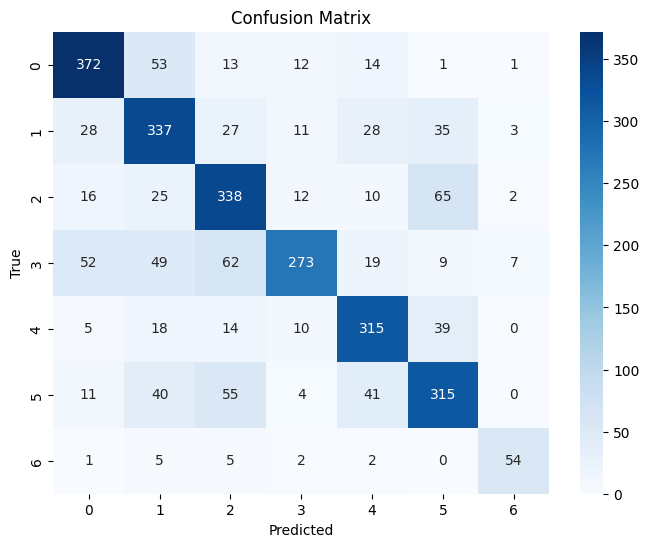

In [13]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [14]:
class_names = val_ds.class_names
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [15]:
import os

val_dir = "E:/final_dataset/val"
class_names = sorted(entry.name for entry in os.scandir(val_dir) if entry.is_dir())

print("Class names:", class_names)

# Use these class names in your classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Class names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised']
Classification Report:
              precision    recall  f1-score   support

       angry       0.77      0.80      0.78       466
     disgust       0.64      0.72      0.68       469
        fear       0.66      0.72      0.69       468
       happy       0.84      0.58      0.69       471
     neutral       0.73      0.79      0.76       401
         sad       0.68      0.68      0.68       466
   surprised       0.81      0.78      0.79        69

    accuracy                           0.71      2810
   macro avg       0.73      0.72      0.72      2810
weighted avg       0.72      0.71      0.71      2810



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


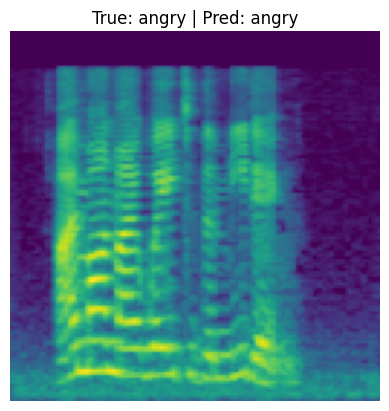

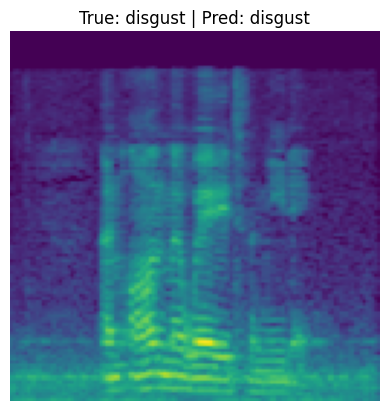

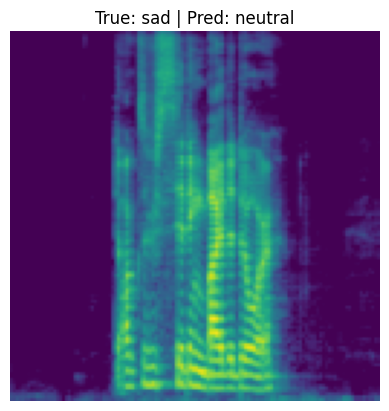

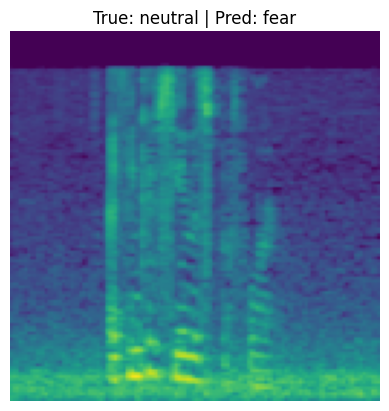

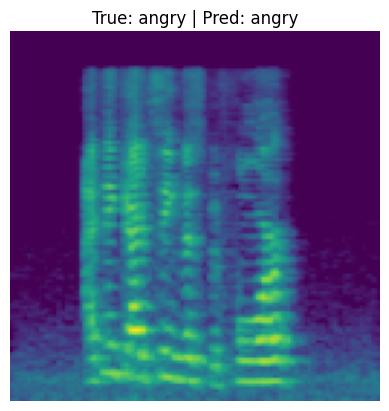

In [16]:
def show_sample_predictions(model, dataset, class_names, num_images=5):
    for images, labels in dataset.take(1):
        preds = model.predict(images)
        for i in range(num_images):
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"True: {class_names[np.argmax(labels[i])]} | Pred: {class_names[np.argmax(preds[i])]}")
            plt.axis('off')
            plt.show()

show_sample_predictions(model, val_ds, class_names)
